In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


file_path = 'Downloads/实习/Lithium Carbonate 99_Min China Spot Historical Data (5).csv'


df = pd.read_csv(file_path, thousands=',', parse_dates=['Date'])


print(df.head(20))



         Date     Price      Open      High       Low  Vol. Change %
0  2024-04-19  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
1  2024-04-18  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
2  2024-04-17  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
3  2024-04-16  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
4  2024-04-15  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
5  2024-04-12  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
6  2024-04-11  109500.0  109500.0  111000.0  108000.0   NaN   -0.90%
7  2024-04-10  110500.0  110500.0  112000.0  109000.0   NaN    0.91%
8  2024-04-09  109500.0  109500.0  111000.0  108000.0   NaN    0.00%
9  2024-04-08  109500.0  109500.0  111000.0  108000.0   NaN    2.82%
10 2024-04-03  106500.0  106500.0  108000.0  105000.0   NaN    0.95%
11 2024-04-02  105500.0  105500.0  107000.0  104000.0   NaN    0.96%
12 2024-04-01  104500.0  104500.0  106000.0  103000.0   NaN    0.00%
13 2024-03-29  104500.0  104500.0 

In [31]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1665 non-null   datetime64[ns]
 1   Price     1665 non-null   float64       
 2   Open      1665 non-null   float64       
 3   High      1665 non-null   float64       
 4   Low       1665 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1665 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 91.2+ KB
None


Date
2017-05-10        NaN
2017-05-11    0.00000
2017-05-12    0.00000
2017-05-15    0.00000
2017-05-16    0.00000
2017-05-17    0.00000
2017-05-18    0.00000
2017-05-19    0.00813
2017-05-22    0.00000
2017-05-23    0.00000
2017-05-24    0.00000
2017-05-25    0.00000
2017-05-26    0.00000
2017-05-30    0.00000
2017-05-31    0.00000
2017-06-01    0.00000
2017-06-02    0.00000
2017-06-05    0.00000
2017-06-06    0.00000
2017-06-07    0.00000
Name: Return, dtype: float64


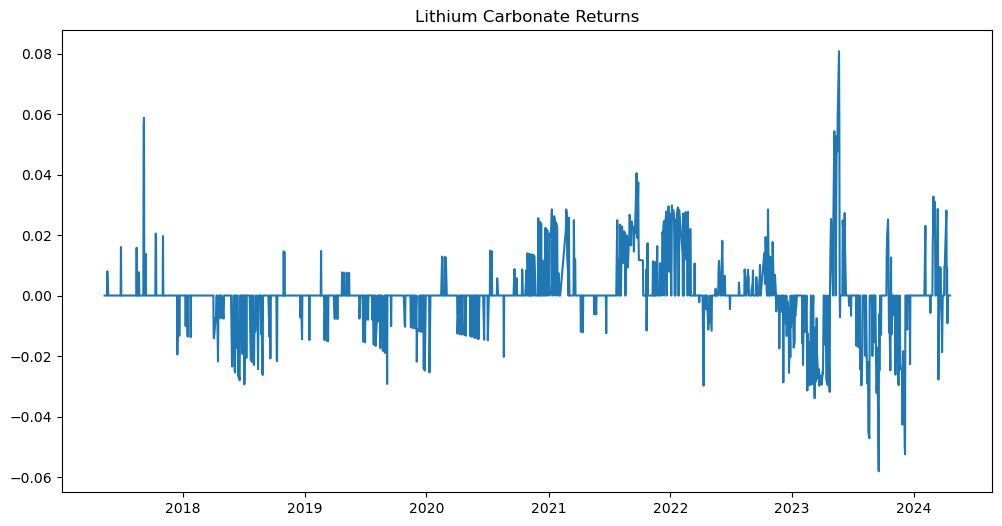

/Users/chenyanyi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyanyi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/chenyanyi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 1664
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5571.462
Date:                Sun, 23 Jun 2024   AIC                         -11134.924
Time:                        12:47:05   BIC                         -11113.256
Sample:                             0   HQIC                        -11126.894
                               - 1664                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.326e-05      0.001      0.073      0.942      -0.002       0.002
ar.L1          0.8459      0.010     83.547      0.000       0.826       0.866
ma.L1         -0.3648      0.020    -17.933      0.0

/Users/chenyanyi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/chenyanyi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


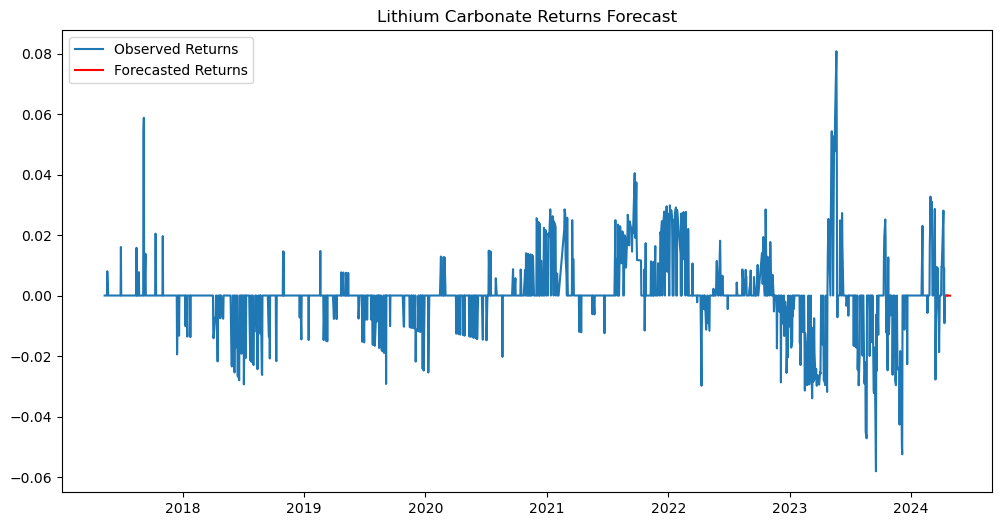

In [38]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


file_path = 'Downloads/实习/Lithium Carbonate 99_Min China Spot Historical Data (5).csv'

df = pd.read_csv(file_path, thousands=',', parse_dates=['Date'])




if 'Date' in df.columns:
    # Set Datecolumn as the index
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    # Convert Price to numeric, coerce errors to NaN 
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
    df.dropna(subset=['Price'], inplace=True)

    # Calculate returns
    df['Return'] = df['Price'].pct_change()

  
    print(df['Return'].head(20))

    # Fill zero returns with a small value to avoid issues with ARIMA 
    df['Return'] = df['Return'].replace(0, 0.0001)

    # Drop NaN values from Returncolumn
    df.dropna(subset=['Return'], inplace=True)

    # Ensure Returncolumn is not empty
    if df['Return'].empty:
        print("No valid data available for ARIMA model.")
    else:
       
        plt.figure(figsize=(12, 6))
        plt.plot(df['Return'])
        plt.title('Lithium Carbonate Returns')
        plt.show()

     
        model = ARIMA(df['Return'], order=(1, 0, 1))
        model_fit = model.fit()

    
        print(model_fit.summary())

      
        forecast = model_fit.forecast(steps=10)
        print(forecast)

        plt.figure(figsize=(12, 6))
        plt.plot(df['Return'], label='Observed Returns')
        plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='D'), forecast, label='Forecasted Returns', color='red')
        plt.title('Lithium Carbonate Returns Forecast')
        plt.legend()
        plt.show()
else:
    print("The 'Date' column is missing in the CSV file.")